# Airbnb Exploratory Data Analysis

## Introduction
In the digital age, most human activities are recorded in application usage. In this study, we use the data set scraped from Airbnb to investigate customer behaviour and the property market.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

In [3]:
airbnb = pd.read_csv("AB_NYC_2019.csv")
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data Cleaning

We see that only 4 columns have null data. Since name and last_review are not that useful in data mining, we can safely drop them. For reviews_per_month, we can assign mean values to the null data.

In [4]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
airbnb = airbnb.drop(['host_name', 'last_review'], axis=1)

In [6]:
airbnb['reviews_per_month'].fillna(value=airbnb['reviews_per_month'].mean(), inplace=True)

We need not deal with null data in property name because it is trivial.

In [7]:
airbnb.isnull().sum()

id                                 0
name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

## Prices vs Neighbourhood

In this section we investigate the average price of the properties, in particularly the cheapest and the priciest neighbourhood.

In [8]:
# Cheapest
airbnb.groupby('neighbourhood').mean().sort_values(by='price').head()['price']

neighbourhood
Bull's Head    47.333333
Hunts Point    50.500000
Tremont        51.545455
Soundview      53.466667
New Dorp       57.000000
Name: price, dtype: float64

In [9]:
# Most expensive
airbnb.groupby('neighbourhood').mean().sort_values(by='price', ascending=False).head()['price']

neighbourhood
Fort Wadsworth    800.000000
Woodrow           700.000000
Tribeca           490.638418
Sea Gate          487.857143
Riverdale         442.090909
Name: price, dtype: float64

We would also like to examine the variation of prices within each neighbourhood group.

<AxesSubplot:title={'center':'Price Variation in Neighbourhood Groups'}, xlabel='neighbourhood_group'>

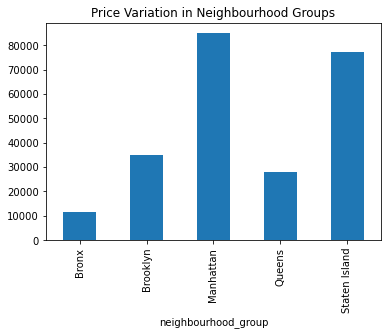

In [10]:
airbnb.groupby('neighbourhood_group').var()['price'].plot.bar(title='Price Variation in Neighbourhood Groups')

##  Pearson correlation analysis

We make a hypothesis that minimum nights required is negatively correlated to the number of bookings, as there poses a threshold to most customers, which is in turn reflected in the number of reviews per month. The correlation matrix confirms our hypothesis. 

In [24]:
corr = airbnb[['minimum_nights', 'reviews_per_month']].corr()
print(corr)

                   minimum_nights  reviews_per_month
minimum_nights           1.000000          -0.091942
reviews_per_month       -0.091942           1.000000


We can also visualise the correlation in a correlation matrix.

<AxesSubplot:>

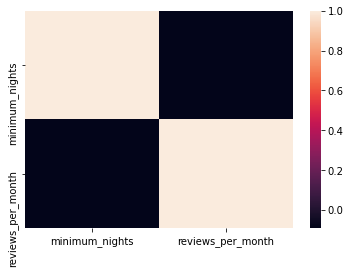

In [25]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

## Location

We can plot location of property against neighbourhood group and price to visualise their relation.

C:\Users\AU YONG Chun Sang\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Neighbourhood Group')]

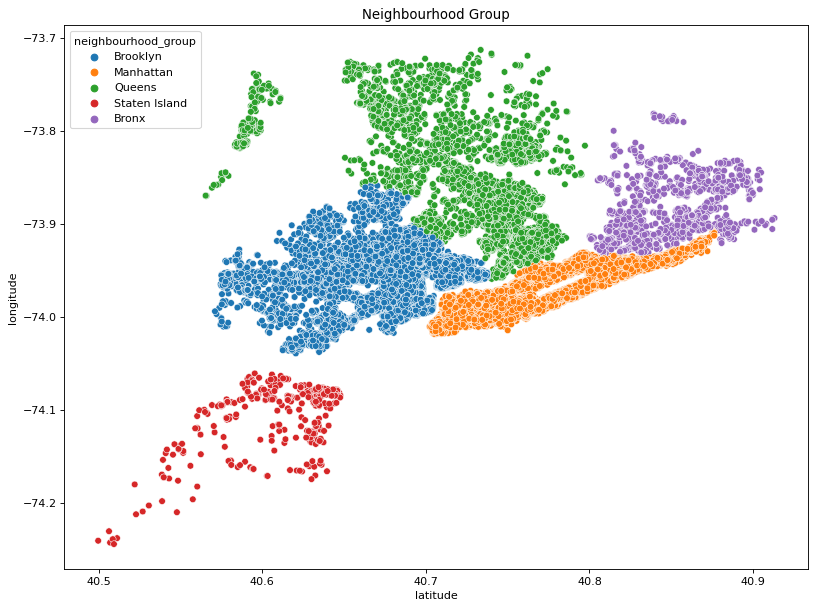

In [13]:
plt.figure(figsize=(12, 9), dpi=80)
sns.scatterplot('latitude', 'longitude', data=airbnb, hue='neighbourhood_group').set(title='Neighbourhood Group')

C:\Users\AU YONG Chun Sang\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Price')]

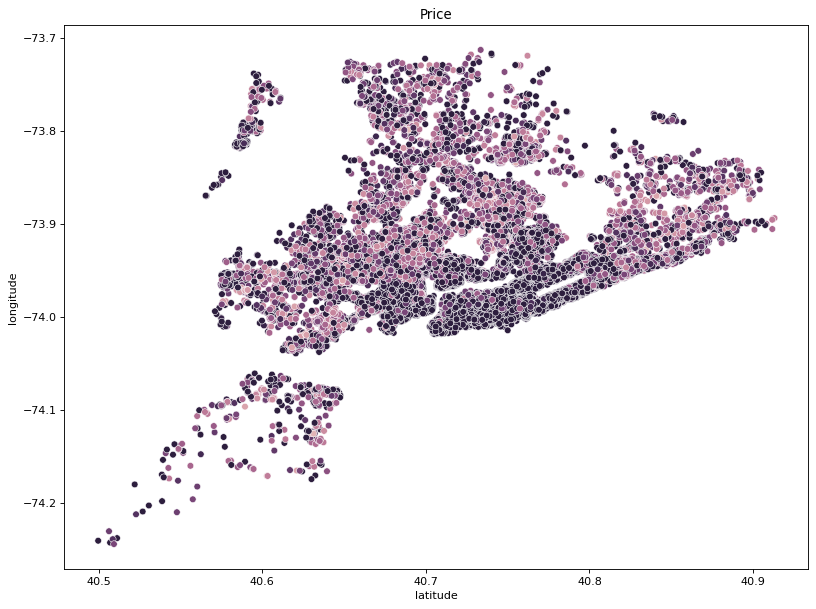

In [14]:
plt.figure(figsize=(12, 9), dpi=80)
sns.scatterplot('latitude', 'longitude', data=airbnb, hue='price', hue_norm=(0, 100), legend=False).set(title='Price')

## Word Cloud

We are interested in the common words seen in the property names. A word cloud is useful in visualising the most frequent words.

(-0.5, 799.5, 799.5, -0.5)

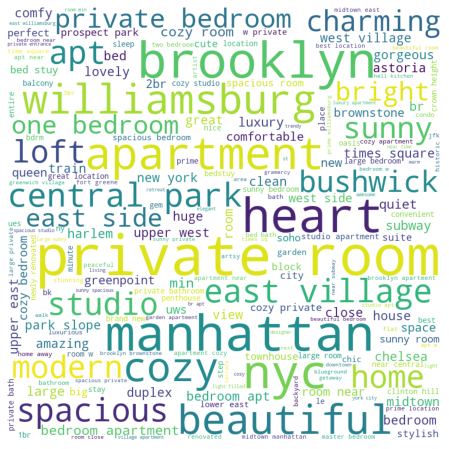

In [15]:
words = []
tokens = [str(sentence).split() for sentence in list(airbnb['name'])]
for i in range(len(tokens)):
    for word in tokens[i]:
        word = word.lower()
        words.append(word)
wordcloud = WordCloud(width = 800, height = 800, background_color ='white').generate(' '.join(words))
                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

## Host

We would like to investigate the factors affecting the number of listings that a host has.

<AxesSubplot:>

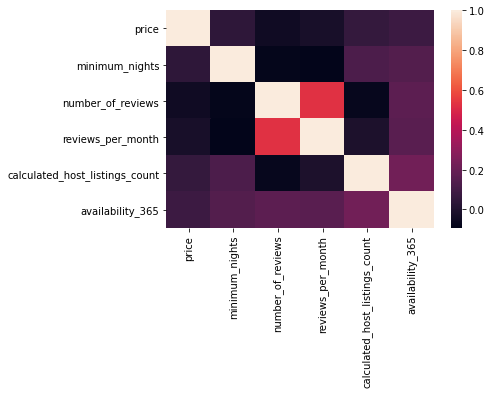

In [16]:
corr = airbnb[['room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

From the row of calculated_host_listings_count, we see that minimum nights required and availability are slightly positively correlated with host listings respectively. Higher the availability means the host is more devoted to the business, so he can afford to list multiple apartments on Airbnb. We can also look at which neighbourhood has the busies hosts.

In [17]:
airbnb.groupby('neighbourhood').mean().sort_values(by='calculated_host_listings_count', ascending=False).head()['calculated_host_listings_count']

neighbourhood
Financial District    114.857527
Theater District       64.944444
Murray Hill            53.865979
Tribeca                42.971751
Woodside               19.378723
Name: calculated_host_listings_count, dtype: float64

The statistic shows that most of the busy hosts list their properties in Manhattan.

## Room Type

We are interested in how does the type of room affect price of listing. The bar chart below shows that an entire apartment and floor is the most expensive. This is in line to the common belief that larger the area is, more expensive is the listing.

<AxesSubplot:title={'center':'Price'}, xlabel='room_type'>

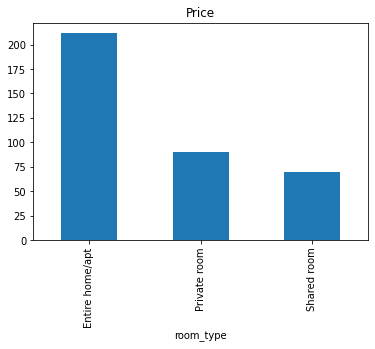

In [19]:
airbnb.groupby('room_type').mean()['price'].plot.bar(title='Price')

We would also like to know if some room types are more prominent in certain neighbourhood areas. 

In [49]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<AxesSubplot:title={'center':'Room Types in Neighbourhoods'}>

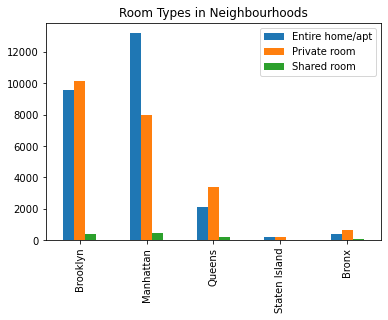

In [55]:
entire_count = []
private_count = []
shared_count = []
groups = airbnb['neighbourhood_group'].unique()
for ng in groups:
    current = airbnb[airbnb['neighbourhood_group'] == ng]
    entire_count.append(current[current['room_type'] == 'Entire home/apt']['id'].count())
    private_count.append(current[current['room_type'] == 'Private room']['id'].count())
    shared_count.append(current[current['room_type'] == 'Shared room']['id'].count())
count = pd.DataFrame({'Entire home/apt': entire_count, 'Private room': private_count, 'Shared room': shared_count}, index=groups)
count.plot.bar(title='Room Types in Neighbourhoods')

We can see that Manhattan is the only area where there are more entire apartment listed than private room, showing that listing the entire apartment is more common in the area. Number of shared room is low across all areas, possibly due to low demand by customers. 

## Conclusion

The variety of columns in this data set has allowed us to effectively investigate the property market and travellers' behaviour, through probing into the relationship between different columns. It is hoped that similar data sets can be released in the near future, from both technology companies and community contributors. 